In [1]:
from sklearn import svm as svm
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv ('zoo_dataSet.csv', encoding = 'ISO-8859-1',)
types = pd.read_csv ('type_dataSet.csv', encoding = 'ISO-8859-1',)

In [3]:
#the first 5 animals in the data
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
#the types of animals
types

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [5]:
#describe of the data
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
#number of columns and rows
data.shape

(101, 18)

In [7]:
#all the animals who have 4 legs
data1 = data["animal_name"]
data1[(data['legs']==4)]

0     aardvark
1     antelope
3         bear
4         boar
5      buffalo
6         calf
9         cavy
10     cheetah
14        crab
17        deer
22    elephant
25        frog
26        frog
28     giraffe
31        goat
35     hamster
36        hare
44     leopard
45        lion
47        lynx
48        mink
49        mole
50    mongoose
52        newt
54     opossum
55        oryx
63    platypus
64     polecat
65        pony
67        puma
68    pussycat
69     raccoon
70    reindeer
89        toad
90    tortoise
91     tuatara
94        vole
98        wolf
Name: animal_name, dtype: object

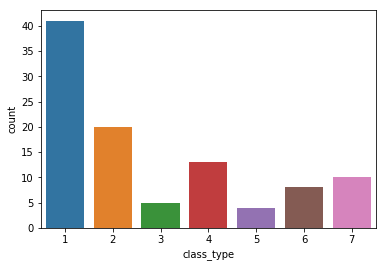

In [8]:
#how many animals there r in each type
sns.countplot(data['class_type'],label="Count")

In [9]:
#all the fish
data1[(data['class_type']==4)]

2         bass
7         carp
8      catfish
12        chub
18     dogfish
34     haddock
38     herring
60        pike
61     piranha
73    seahorse
82        sole
86    stingray
92        tuna
Name: animal_name, dtype: object

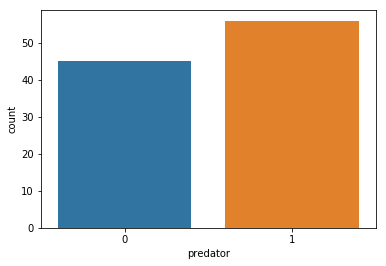

In [10]:
#how many animals are predators and how many vegetarian
sns.countplot(data['predator'],label="Count")

In [11]:
from sklearn.model_selection import train_test_split
all_x = data.iloc[:, 1:17]
all_y = data.iloc[:, 17]
print(all_x)
print(all_y)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
5       1         0     0     1         0        0         0        1   
6       1         0     0     1         0        0         0        1   
7       0         0     1     0         0        1         0        1   
8       0         0     1     0         0        1         1        1   
9       1         0     0     1         0        0         0        1   
10      1         0     0     1         0        0         1        1   
11      0         1     1     0         1        0         0        0   
12      0         0     1     0         0        1 

In [12]:
X_train,X_test,y_train,y_test = train_test_split(all_x,all_y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 16)
(26, 16)
(75,)
(26,)


In [13]:
#svm.SVC
clf = svm.SVC()
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [14]:
clf.score(X_test,y_test)

0.9615384615384616

In [15]:
clf.predict(X_test[10:15])

array([3, 1, 2, 6, 1], dtype=int64)

In [16]:
y_test[10:15]

52    5
65    1
56    2
24    6
70    1
Name: class_type, dtype: int64

In [17]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
y_pred = knn_classifier.predict(X_test)
y_pred

array([2, 6, 1, 1, 6, 2, 7, 7, 1, 4, 5, 1, 2, 6, 1, 1, 7, 4, 5, 1, 1, 1,
       2, 1, 7, 2], dtype=int64)

In [19]:
accuracy = accuracy_score(y_test,y_pred)*100
print('% accuracy = ' , accuracy )

% accuracy =  100.0


In [20]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
#predicting the data 
y_pred=logreg.predict(X_train)
y_pred

C:\Users\97252\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\97252\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([4, 7, 1, 4, 2, 1, 6, 1, 3, 1, 4, 1, 1, 1, 1, 7, 6, 1, 1, 3, 6, 2,
       4, 1, 7, 3, 1, 4, 2, 2, 1, 1, 2, 2, 4, 1, 4, 5, 1, 2, 4, 2, 2, 1,
       1, 1, 2, 1, 2, 3, 7, 1, 1, 4, 2, 1, 1, 7, 1, 1, 5, 6, 2, 2, 1, 4,
       7, 1, 6, 2, 1, 2, 4, 1, 1], dtype=int64)

In [21]:
from sklearn import metrics
print (metrics.accuracy_score(y_train,y_pred))

0.9866666666666667
